# Dinmensionality Reduction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats

# Diagonalization of the correlation matrix

The implementation of the method can be explained by the need to eliminate redundant factors that is those that are correlated and the simultaneous use of which leads to the redundancy of the vector representation of input data. In other words, the dimension of factors is reduced without losing the uniqueness of the object description.

The method consists in creating groups of the most correlated factors. The group of the most correlated factors is constructed in accordance with the rule that the average correlation between factors in the group cannot be less than some predefined value (0.85).

## Dataset

Let us consider the LETOR dataset. The dataset is a machine learning data, in which queries and urls are represented by IDs. The dataset consists of feature vectors extracted from query-url pairs along with relevance judgment labels. A query-url pair is represented by a 136-dimensional feature vector, i.e., the total number of features is 136. The list of features is available [here](https://www.microsoft.com/en-us/research/project/mslr/).

In [2]:
df = pd.read_csv("letor.csv", sep=' ')

Select only features of the dataset

In [3]:
features = list(map(lambda x: str(x), range(1,137)))
df_features = df[features]
df_features

,1,2,3,4,5,6,7,8,9,10,...,127,128,129,130,131,132,133,134,135,136
0,2,0,2,1,2,1.0,0.000000,1.000000,0.500000,1.0,...,35,1,0,266,25070,28,7,0,0,0.0
1,2,0,0,0,2,1.0,0.000000,0.000000,0.000000,1.0,...,17,93,0,153,12860,65,158,0,0,0.0
2,2,0,1,0,2,1.0,0.000000,0.500000,0.000000,1.0,...,19,0,0,153,1131,112,141,0,0,0.0
3,2,0,2,1,2,1.0,0.000000,1.000000,0.500000,1.0,...,50,81775,0,560,61224,1,14,0,0,0.0
4,1,0,0,0,1,0.5,0.000000,0.000000,0.000000,0.5,...,24,0,0,57953,15600,15,12,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241516,3,0,1,1,3,1.0,0.000000,0.333333,0.333333,1.0,...,60,9,1,550,49786,23,102,0,0,0.0
241517,3,1,0,0,3,1.0,0.333333,0.000000,0.000000,1.0,...,91,268,0,181,53904,1,2,0,0,0.0
241518,3,0,3,0,3,1.0,0.000000,1.000000,0.000000,1.0,...,69,14,9,4591,32817,3,9,0,0,0.0
241519,3,0,1,1,3,1.0,0.000000,0.333333,0.333333,1.0,...,51,0,1,1549,59332,10,4,0,0,0.0


Compute the correlation coefficient among the variables

In [4]:
corr = df_features.corr()
corr

,1,2,3,4,5,6,7,8,9,10,...,127,128,129,130,131,132,133,134,135,136
1,1.000000,0.137548,0.565023,0.172378,0.980274,0.616582,0.005643,0.183960,-0.113397,0.535994,...,0.158973,-0.020995,-0.000895,-0.191828,-0.109945,-0.124089,0.041105,-0.006569,-0.019765,-0.001504
2,0.137548,1.000000,0.228510,0.201225,0.148090,0.132108,0.887707,0.180539,0.140995,0.148429,...,0.092022,-0.004405,0.185725,0.047965,0.075171,-0.009627,0.032746,0.003968,-0.007738,0.005845
3,0.565023,0.228510,1.000000,0.327087,0.543482,0.502705,0.138635,0.774023,0.126713,0.445472,...,0.125881,-0.010354,0.038755,-0.145473,-0.061053,-0.059059,0.063733,-0.001527,-0.021492,-0.000072
4,0.172378,0.201225,0.327087,1.000000,0.212499,0.182916,0.174150,0.276508,0.827239,0.270935,...,0.261480,0.018523,0.075986,-0.119396,0.131029,0.065120,0.083168,0.003503,-0.011826,0.001966
5,0.980274,0.148090,0.543482,0.212499,1.000000,0.558581,0.014256,0.145866,-0.070469,0.562461,...,0.169992,-0.015813,-0.012686,-0.195684,-0.098771,-0.090797,0.039606,-0.006701,-0.021140,-0.001763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,-0.124089,-0.009627,-0.059059,0.065120,-0.090797,-0.187535,-0.020267,-0.082783,0.055868,-0.112138,...,-0.019705,0.010178,-0.079160,-0.109488,-0.205240,1.000000,0.459579,-0.001626,-0.004663,0.001878
133,0.041105,0.032746,0.063733,0.083168,0.039606,0.001719,0.010673,0.021431,0.027673,-0.005671,...,-0.048332,-0.007029,-0.054473,-0.138067,-0.331417,0.459579,1.000000,-0.001035,-0.011487,0.007168
134,-0.006569,0.003968,-0.001527,0.003503,-0.006701,0.002351,0.010826,0.007066,0.011483,0.003137,...,-0.008084,-0.000062,0.001446,0.007351,0.007605,-0.001626,-0.001035,1.000000,0.006303,-0.000055
135,-0.019765,-0.007738,-0.021492,-0.011826,-0.021140,-0.026754,-0.007813,-0.022346,-0.011550,-0.031145,...,-0.032815,0.000619,0.024132,0.048490,0.031169,-0.004663,-0.011487,0.006303,1.000000,-0.000140


<AxesSubplot:>

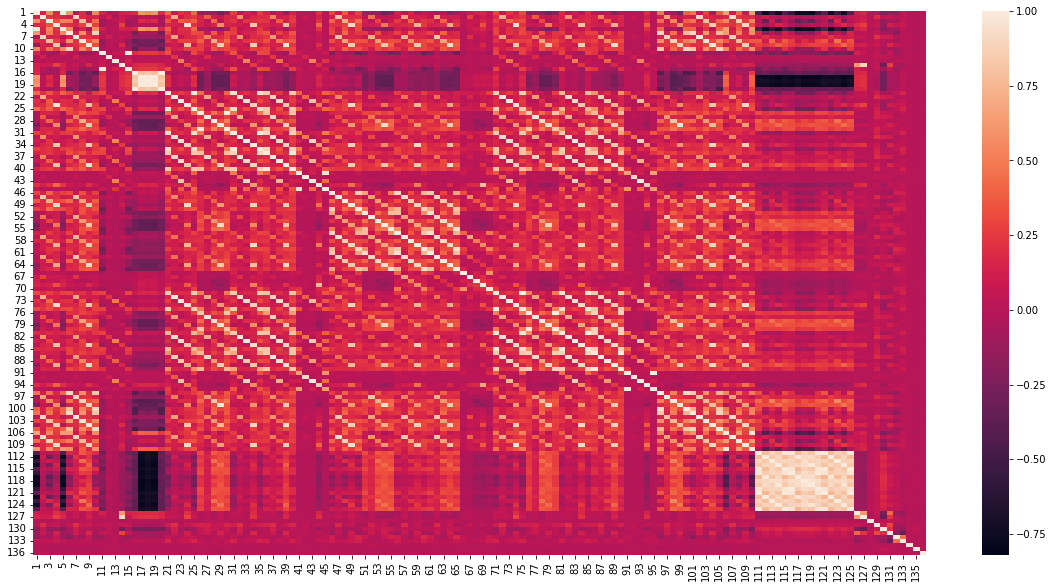

In [5]:
plt.figure(figsize=(20,10))
sb.heatmap(corr)

Perform the Agglomerative clustering of the matrix. The group of the most correlated factors is constructed in accordance with the rule that the average correlation between factors in the group cannot be less than some predefined value (0.8).

In [6]:
def perform_clustering(corr, clusters = None, limit = 0.8):
    if clusters is None:
        corr = 1 - abs(corr)
        clusters = list(map(lambda x: [x], corr.columns))
    max_val = 1 - limit
    cl = []
    for i in range(len(clusters)-1):
        for j in range(i+1, len(clusters)):
            avg_dist = 0
            for el1 in clusters[i]:
                for el2 in clusters[j]:
                    avg_dist += corr[el1][el2]
            avg_dist /= len(clusters[i])*len(clusters[j])
            if avg_dist <= max_val:
                max_val = avg_dist
                cl = [i,j]
    if len(cl)>1:
        clusters[cl[0]] += clusters[cl[1]]
        del clusters[cl[1]]
        clusters = perform_clustering(corr, clusters, limit)
    return clusters
    
clusters = perform_clustering(corr)
print('Total number of clusters is ', len(clusters))
print(clusters)

Total number of clusters is  49
[['1', '5'], ['2', '7', '102', '47', '107', '57', '62'], ['3'], ['4', '24', '74', '109', '49', '9', '104', '39', '89', '34', '84', '59', '64'], ['6', '101', '10', '105', '96', '100'], ['8', '103', '98'], ['11', '15'], ['12'], ['13'], ['14', '127'], ['16', '20', '17', '19', '18'], ['21', '25', '31', '35', '36', '40', '71', '75', '81', '85'], ['22', '72', '32', '82', '37', '87'], ['23', '73', '33', '83', '38', '88'], ['26', '30'], ['27', '77'], ['28', '78'], ['29', '99', '79', '54'], ['41', '45'], ['42', '92'], ['43', '93'], ['44', '94'], ['46', '56', '61'], ['48', '108'], ['50', '60'], ['51'], ['52', '97'], ['53', '63'], ['55', '65'], ['58'], ['66'], ['67'], ['68'], ['69'], ['70'], ['76', '80', '86', '90'], ['91', '95'], ['106', '110'], ['111', '121', '115', '125', '116', '120', '113', '123', '112', '122', '117', '114', '124', '119', '118'], ['126'], ['128'], ['129'], ['130'], ['131'], ['132'], ['133'], ['134'], ['135'], ['136']]


Let us permute columns and vizualize the correlation matrix

<AxesSubplot:>

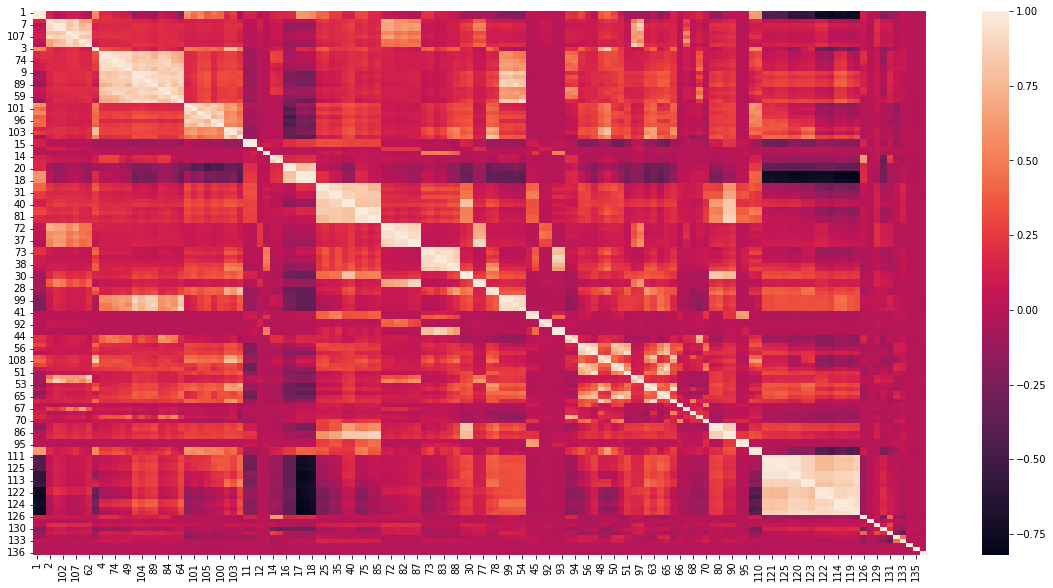

In [7]:
order = []
for cl in clusters:
    order+=cl

plt.figure(figsize=(20,10))
sb.heatmap(df_features[order].corr())

Choose the members from these groups based on the level of correlation with other group members. Using the central element

In [9]:
def elect_members(corr, clusters):
    members = []
    corr = 1 - abs(corr)
    for cl in clusters:
        min_v = 0
        element = cl[0]
        if len(cl)!=1:
            for el1 in cl:
                v = 0            
                for el2 in cl:
                    v+=corr[el1][el2]
                if v >= min_v:
                    min_v = v
                    element = el1
        members.append(element)
    return members
                    
members = elect_members(corr, clusters)  

In [11]:
final_df = df_features[members]

# Principal Component Analysis

PCA is an orthogonal projection or transformation of the data into a (possibly lower dimensional) subspace so that the variance of the projected data is maximized.	It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.
It is a linear transformation that chooses a new coordinate system for the data set such that greatest variance by any projection of the data set comes to lie on the first axis (then called the first principal component), the second greatest variance on the second axis, and so on.

### Dataset
Condider Iris Dataset. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
features = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=features)
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Vizualize the initial data**

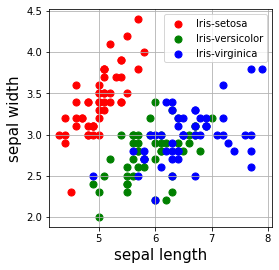

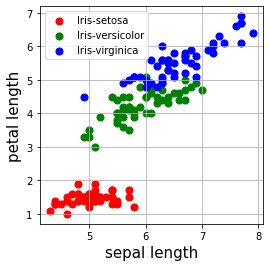

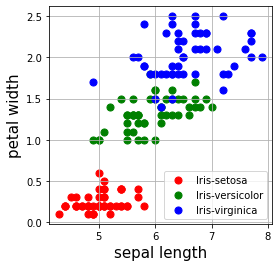

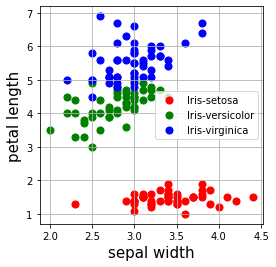

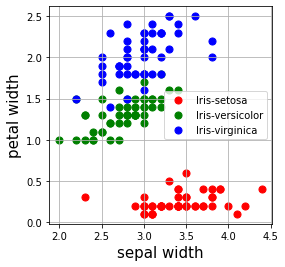

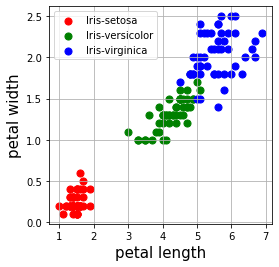

In [6]:
import matplotlib.pyplot as plt
targets = list(pd.unique(df[features[-1]]))

for i in range(len(features)-1):
    for j in range(i+1, len(features)-1):
        
        fig = plt.figure(figsize = (4,4))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel(features[i], fontsize = 15)
        ax.set_ylabel(features[j], fontsize = 15)
        colors = ['r', 'g', 'b']
        for target, color in zip(targets,colors):
            indicesToKeep = df['target'] == target
            ax.scatter(df.loc[indicesToKeep, features[i]], 
                       df.loc[indicesToKeep, features[j]], 
                       c = color, s = 50)
        ax.legend(targets)
        ax.grid()
plt.show()        

### Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

In [7]:
df.loc[:, features[:-1]]

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.loc[:, features[:-1]].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
df_scaled = pd.DataFrame(data = x, columns = features[:-1])

**PCA Projection to 2D**

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Let us concatenate initial `target` column with 2 principal components.

In [13]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


**Visualize 2D Projection**

This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

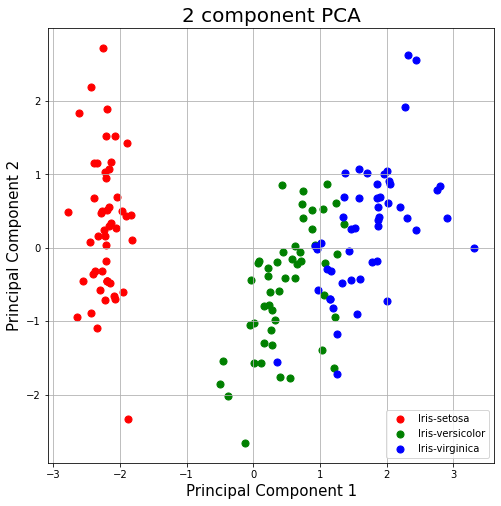

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Each principal component is a linear combination of the original variables. To obtain the weights, use the following command:

In [12]:
pd.DataFrame(pca.components_,columns=df_scaled.columns,index = ['PC-1','PC-2'])

,sepal length,sepal width,petal length,petal width
PC-1,0.522372,-0.263355,0.581254,0.565611
PC-2,0.372318,0.925556,0.021095,0.065416


**Note:** each coefficient represents the correlation between a particular pair of component and feature. For example, sepal width and PC-2 are strongly correlated (inversely) since the correlation coef is -0.92. In the other hand, petal length and PC-2 are not correlated at all since corr coef is -0.02. So, PC-2 grows as sepal width decreases and PC-2 is independent of changes in petal length. That is, for PC-2 sepal width is important while petal length is not. Same analysis you can conduct for the other variables considering correlation coef is in the interval [-1, 1] 

**IMPORTANT**: As a side comment, note the PCA sign does not affect its interpretation since the sign does not affect the variance contained in each component. Only the relative signs of features forming the PCA dimension are important. 

### Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [19]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In our case you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

### Number of components

In general, there is no need to set the total number of components. For instance, you can choose the minimum number of principal components automatically if you set how much information the components should retain.

In [20]:
# Make principal components based on variance limit
pca = PCA(.95)
principalComponents = pca.fit_transform(x)
print('The total number of principal components is', principalComponents.shape[1])

The total number of principal components is 2


However, if you need to contain more information, you can increase the limit.

In [21]:
pca = PCA(.99)
principalComponents = pca.fit_transform(x)
print('The total number of principal components is', principalComponents.shape[1])

The total number of principal components is 3


In general, you can construct the plot which represent the cummulative explained variance.

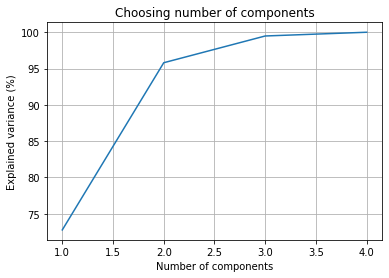

In [25]:
pca = PCA(n_components=x.shape[1])
principalComponents = pca.fit_transform(x)

plt.plot(range(1,x.shape[1]+1), 100*np.cumsum(pca.explained_variance_ratio_))
plt.title('Choosing number of components')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.grid()

### PCA for vizualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. 

Let us consider the load_digits which contains 1797 samples of hand-written digits (8x8 pixel images). The total number of dimensions is 64.

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

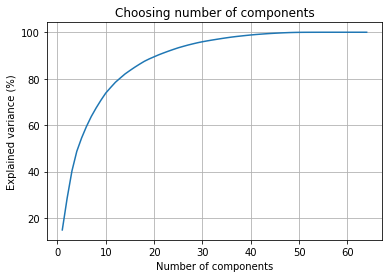

In [30]:
x = digits.data
pca = PCA(n_components=x.shape[1])
principalComponents = pca.fit_transform(x)

plt.plot(range(1,x.shape[1]+1), 100*np.cumsum(pca.explained_variance_ratio_))
plt.title('Choosing number of components')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.grid()

Let us compress the data into two dimensions and vizualize the data.

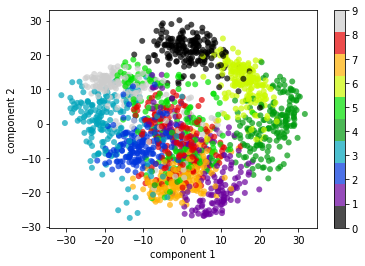

In [23]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.7,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

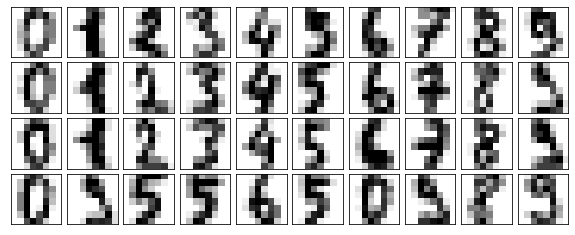

In [24]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

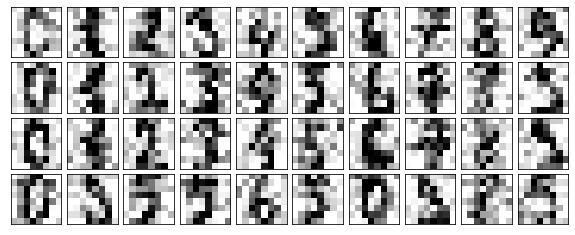

In [31]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [32]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

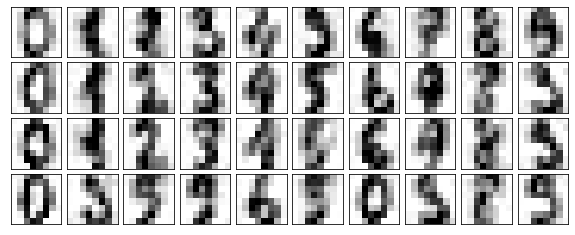

In [33]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Factor Analysis
Factor analysis is a data reduction technique used to reduce a large number of variables to a smaller set of underlying factors that summarize the essential information contained in the variables

In [35]:
# Load the package for factor analysis
from factor_analyzer import FactorAnalyzer

### Dataset
Condider SAQ.xlsx dataset which is a questionnaire to measure various aspects of students' anxiety towards learning Python (originally - SPSS). Each question was a statement followed by a five-point Likert scale ranging from ‘strongly disagree’ through ‘neither agree or disagree’ to ‘strongly agree’.

Questionnaire (1 - strongly agree, 5 - strongly disagree):
1. Statiscs makes me cry (stat_cry)
2. My friends will think I'm stupid for not being able to cope with Python (afraid_python)
3. Standard deviations excite me (sd_excite)
4. I dream that Pearson is attacking me with correlation coefficients (nmare_pearson)
5. I don't understand statistics (du_stat)
6. I have little experience of computers (lexp_comp)
7. All computers hate me (comp_hate)
8. I have never been good at mathematics (good_math)
9. My friends are better at statistics than me (frs_better_stat)
10. Computers are useful only for playing games (com_for_games)
11. I did badly at mathematics at school (bad_math)
12. People try to tell you that Python makes statistics easier to understand but it doesn't (python_no_help)
13. I worry that I will cause irreparable damage because of my incompetenece with computers (damaging_comp)
14. Computers have minds of their own and deliberately go wrong whenever I use them (comp_alive)
15. Computers are out to get me (comp_getme)
16. I weep openly at the mention of central tendency (weep_ct)
17. I slip into a coma whenever I see an equation (slip_coma)
18. Python always crashes when I try to use it (python_crash)
19. Everybody looks at me when I use Python (eb_looks)
20. I can't sleep for thoughts of eigen vectors (no_sleep_ev)
21. I wake up under my duvet thinking that I am trapped under a normal distribtion (nm_normdist)
22. My friends are better at Python than I am (frs_better_python)
23. If I'm good at statistics my friends will think I'm a nerd (stat_nerd)

In [21]:
df = pd.read_excel("SAQ.xlsx")
df

,stat_cry,afraid_python,sd_excite,nmare_pearson,du_stat,lexp_comp,comp_hate,good_math,frs_better_stat,com_for_games,...,comp_alive,comp_getme,weep_ct,slip_coma,python_crash,eb_looks,no_sleep_ev,nm_normdist,frs_better_python,stat_nerd
0,2,1,4,2,2,2,3,1,1,2,...,2,2,3,1,2,3,2,2,2,5
1,1,1,4,3,2,2,2,2,5,2,...,3,4,3,2,2,3,4,4,4,2
2,2,3,2,2,4,1,2,2,2,2,...,4,2,3,2,3,1,4,3,2,2
3,3,1,1,4,3,3,4,2,2,4,...,3,3,3,2,4,2,4,4,4,3
4,2,1,3,2,2,3,3,2,4,2,...,2,2,2,2,3,3,4,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,3,1,2,2,2,1,2,3,2,2,...,3,3,3,3,2,2,3,3,2,4
2567,3,1,2,3,4,4,4,3,2,1,...,4,4,5,5,3,1,5,4,3,1
2568,3,1,2,3,3,2,2,2,1,4,...,2,2,3,2,2,2,4,3,2,4
2569,3,1,3,2,4,2,3,4,1,3,...,3,3,3,3,2,2,4,4,2,3


We have now loaded the data. The first step of the factor analysis is to compute the correlation.

**Problem 1:** compute the correlation matrix

<AxesSubplot:>

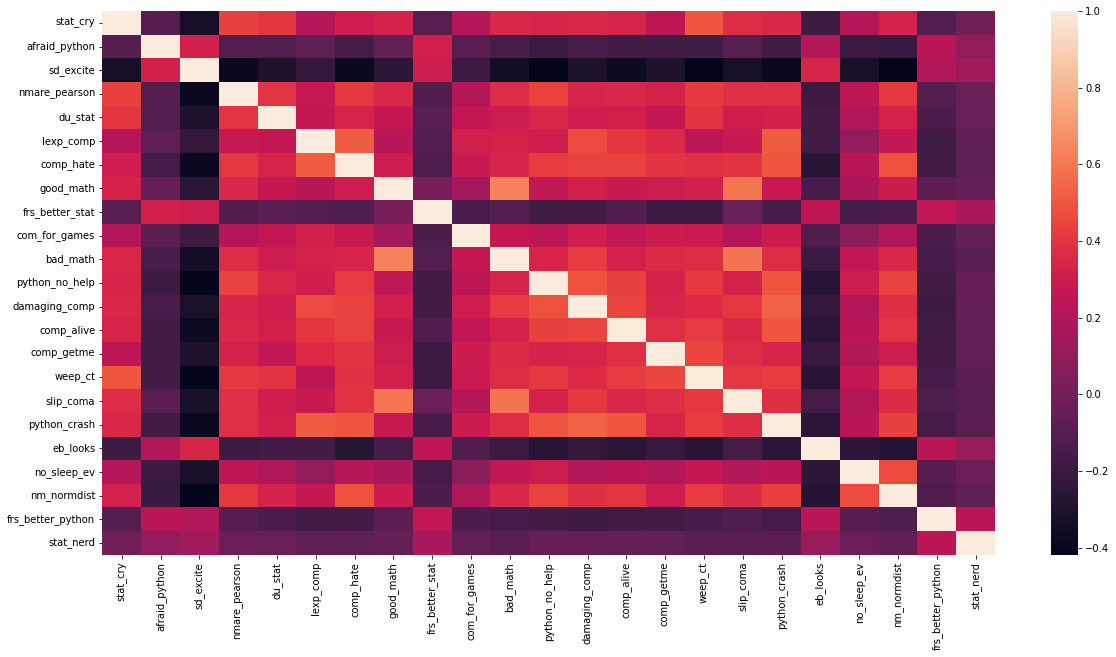

In [22]:
plt.figure(figsize=(20,10))
c= df.corr()
sb.heatmap(c)

### Adequacy Test


Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
- Bartlett’s Test
- Kaiser-Meyer-Olkin Test

**Bartlett’s test** of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [23]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(19357.411459993, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

**Kaiser-Meyer-Olkin (KMO)** Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [40]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.9301739808421337

The KMO statistic varies between 0 and 1. 
- “0” – indicates the diffusion in the pattern of correlations (factor analysis is likely to be inappropriate).
- “1” – indicates that factor analysis should yield distinct and reliable factors. 


### Number of factors

To figure out how many factors we would need, we can look at eigenvalues, which is a measure of how much of the variance of the variables does a factor explain. An eigenvalue of more than one means that the factor explains more variance than a unique variable. An eigenvalue of 2.5 means that the factor would explain the variance of 2.5 variables, and so on.

The eigenvalue is a good criterion for determining the number of factors. Generally, an eigenvalue greater than 1 will be considered as selection criteria for the feature.

In [41]:
fa = FactorAnalyzer()
fa.fit(df)
#Get Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([7.29004706, 1.73882875, 1.31675153, 1.22719815, 0.98787789,
       0.89533041, 0.80556039, 0.78281994, 0.75097119, 0.71695772,
       0.68358773, 0.66950156, 0.61199758, 0.57773774, 0.54918754,
       0.52315038, 0.50839618, 0.45593985, 0.42380357, 0.40779093,
       0.37947986, 0.36402226, 0.3330618 ])

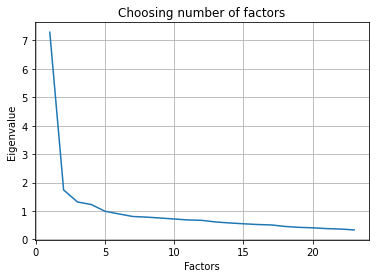

In [42]:
#Plot eigenvalues
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Choosing number of factors')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()

We will only use 4 factors here. These factors have eigenvalues of 7.3, 1.7, 1.3 and 1.2, meaning that they describe the variance of about 11.57 variables.

### Rotation

The FactorAnalyzer function is where we specify the number of factors we want as well as the type of rotation. Simply put, the idea of rotation is to rotate the factors in order to achieve a simpler and more interpretable structure. Many types of rotations exist. Below, I will use varimax rotation, which maximizes the sum of the variance of squared loadings while ensuring that the factors created are not correlated (orthogonality). Let’s see what factors are created.

In [43]:
factors = 4
fa = FactorAnalyzer(factors, rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

**Note:**
- Use orthogonal rotation when you believe your factors should theoretically independent (unrelated to each other).
- Use oblique rotation when you believe factors should be related to each other.

In [44]:
# Get variance of each factors
fa.get_factor_variance()

(array([3.04014607, 2.84983946, 1.9855981 , 1.43565015]),
 array([0.13218026, 0.12390606, 0.08633035, 0.06241957]),
 array([0.13218026, 0.25608633, 0.34241668, 0.40483625]))

1st row: The “SS loadings” row is the sum of squared loadings
2nd row: “Proportion Var” is simply the proportion of variance explained by each factor
3rd row: "Cumulative Var" gives the cumulative proportion of variance explained

In our data, total 39% cumulative Variance explained by the 4 factors.

**Factor loadings**

In [45]:
loads = fa.loadings_
print(loads)

[[ 0.50497671  0.21730852  0.26601194 -0.00451545]
 [-0.20871545 -0.03143886  0.00939548  0.46451401]
 [-0.50480039 -0.18001338 -0.15843453  0.39963159]
 [ 0.52770902  0.28045442  0.24796619 -0.02679931]
 [ 0.4362123   0.26688526  0.1871723  -0.04533256]
 [ 0.04557103  0.75412563  0.12420037 -0.09880904]
 [ 0.36518598  0.55850064  0.16049056 -0.13193302]
 [ 0.21841119  0.14822263  0.76027914 -0.00238475]
 [-0.13319776 -0.07283149  0.05599725  0.55887818]
 [ 0.14292413  0.37925751  0.1350675  -0.12051977]
 [ 0.23780145  0.26690268  0.68695843 -0.17004986]
 [ 0.5108231   0.39684453  0.10796048 -0.15264402]
 [ 0.28851602  0.56343847  0.22809595 -0.14418079]
 [ 0.38891719  0.48470515  0.14759436 -0.12973327]
 [ 0.27658641  0.37695408  0.25133447 -0.20031979]
 [ 0.54382016  0.2785414   0.24493756 -0.15650413]
 [ 0.29566647  0.27351732  0.64034974 -0.05276834]
 [ 0.36685762  0.61114368  0.13589809 -0.13041504]
 [-0.28165774 -0.1457381  -0.05926731  0.3753101 ]
 [ 0.46423502  0.03494104  0.08

The higher a factor loading, the more important a variable is for said factor. A loading cutoff of 0.4 will be used here. This cutoff determines which variables belong to which factor. 

In [ ]:
col_names = list(df)
cutoff = 0.4
for i in range(loads.shape[1]):
    print("Factor #", i+1, ':', sep='')
    for j in range(loads.shape[0]):
        if loads[j][i]>=cutoff:
            print(col_names[j])

Now let us look at the questionnaire again:
Questionnaire (1 - strongly agree, 5 - strongly disagree):
1. Statiscs makes me cry (stat_cry)
2. My friends will think I'm stupid for not being able to cope with Python (afraid_python)
3. Standard deviations excite me (sd_excite)
4. I dream that Pearson is attacking me with correlation coefficients (nmare_pearson)
5. I don't understand statistics (du_stat)
6. I have little experience of computers (lexp_comp)
7. All computers hate me (comp_hate)
8. I have never been good at mathematics (good_math)
9. My friends are better at statistics than me (frs_better_stat)
10. Computers are useful only for playing games (com_for_games)
11. I did badly at mathematics at school (bad_math)
12. People try to tell you that Python makes statistics easier to understand but it doesn't (python_no_help)
13. I worry that I will cause irreparable damage because of my incompetenece with computers (damaging_comp)
14. Computers have minds of their own and deliberately go wrong whenever I use them (comp_alive)
15. Computers are out to get me (comp_getme)
16. I weep openly at the mention of central tendency (weep_ct)
17. I slip into a coma whenever I see an equation (slip_coma)
18. Python always crashes when I try to use it (python_crash)
19. Everybody looks at me when I use Python (eb_looks)
20. I can't sleep for thoughts of eigen vectors (no_sleep_ev)
21. I wake up under my duvet thinking that I am trapped under a normal distribtion (nm_normdist)
22. My friends are better at Python than I am (frs_better_python)
23. If I'm good at statistics my friends will think I'm a nerd (stat_nerd)

Here are the 4 factors created, the variables they contain and their possible “interpretability”:
1. **Factor 1: Fear of Statistics**
2. **Factor 2: Fear of Computers**
3. **Factor 3: Fear of Maths**
4. **Factor 4: Peer Evaluation**

### Append new factors to dataset

In [ ]:
new_variables = pd.DataFrame(fa.fit_transform(df))
for i in range(new_variables.shape[1]):
    df["Factor"+ str(i+1)] = new_variables[i]
df

### To conclude
Factor analysis explores large dataset and finds interlinked associations. It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the market researchers to compress the market situations and find the hidden relationship among consumer taste, preference, and cultural influence. Also, It helps in improve questionnaire in for future surveys. Factors make for more natural data interpretation.

Results of factor analysis are controversial. Its interpretations can be debatable because more than one interpretation can be made of the same data factors. After factor identification and naming of factors requires domain knowledge.